In [1]:
import pandas as pd
import seaborn as sns
import mta_functions
from mta_plots import hourlyLinePlots

Retrieve Top Stations

In [2]:
# Load processed mta data pickle file
mta_data = pd.read_pickle('../dump/mta_data_processed')

In [3]:
# Group traffic values by station and date
top_traffic_stations_df = mta_data.groupby(['STATION','DATE','WEEKDAY'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False)

In [4]:
# Create pivots tables
top_traffic_stations_wide = mta_data.groupby(['STATION','DATE'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False).pivot("DATE", "STATION", "TRAFFIC")

In [5]:
# Generate list of top stations
top_stations_list = mta_functions.topStations(top_traffic_stations_wide, 10)

In [6]:
# Filter by stations with top counts
top_traffic_stations_df = top_traffic_stations_df[top_traffic_stations_df.STATION.isin(top_stations_list)]

In [7]:
# Export top stations
# top_traffic_stations_df.to_csv('top_traffic_stations.csv')
top_traffic_stations_df

,STATION,DATE,WEEKDAY,TRAFFIC
3275,34 ST-PENN STA,2018-06-21,Thursday,334745
3239,34 ST-PENN STA,2018-05-16,Wednesday,330617
3240,34 ST-PENN STA,2018-05-17,Thursday,329526
3267,34 ST-PENN STA,2018-06-13,Wednesday,329228
3274,34 ST-PENN STA,2018-06-20,Wednesday,326507
...,...,...,...,...
2486,23 ST,2018-05-27,Sunday,56839
2487,23 ST,2018-05-28,Monday,56584
12194,FULTON ST,2018-05-19,Saturday,56417
12188,FULTON ST,2018-05-13,Sunday,53720


Weekly Averages by Station

In [8]:
top_traffic_stations_weekday_average = top_traffic_stations_df.groupby(['STATION','WEEKDAY'], as_index=False).TRAFFIC.mean().sort_values('TRAFFIC', ascending=False)
top_traffic_stations_weekday_average

,STATION,WEEKDAY,TRAFFIC
32,34 ST-PENN STA,Thursday,325897.125
34,34 ST-PENN STA,Wednesday,322668.125
33,34 ST-PENN STA,Tuesday,317236.250
28,34 ST-PENN STA,Friday,310521.625
76,GRD CNTRL-42 ST,Wednesday,293837.250
...,...,...,...
17,23 ST,Sunday,71472.625
45,59 ST COLUMBUS,Sunday,70995.875
44,59 ST COLUMBUS,Saturday,70635.000
65,FULTON ST,Saturday,68525.000


In [9]:
# Sort by weekday
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
wc = pd.CategoricalDtype(categories=weekdays, ordered=True)
top_traffic_stations_weekday_average['WEEKDAY'] = top_traffic_stations_weekday_average['WEEKDAY'].astype(wc)
top_traffic_stations_weekday_average

,STATION,WEEKDAY,TRAFFIC
32,34 ST-PENN STA,Thursday,325897.125
34,34 ST-PENN STA,Wednesday,322668.125
33,34 ST-PENN STA,Tuesday,317236.250
28,34 ST-PENN STA,Friday,310521.625
76,GRD CNTRL-42 ST,Wednesday,293837.250
...,...,...,...
17,23 ST,Sunday,71472.625
45,59 ST COLUMBUS,Sunday,70995.875
44,59 ST COLUMBUS,Saturday,70635.000
65,FULTON ST,Saturday,68525.000


In [10]:
top_stations_weekday_averages_wide = top_traffic_stations_weekday_average.pivot("WEEKDAY", "STATION", "TRAFFIC")
top_stations_weekday_averages_wide

STATION,125 ST,14 ST-UNION SQ,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,59 ST COLUMBUS,86 ST,CANAL ST,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
WEEKDAY,,,,,,,,,,,,
Sunday,84865.125000,115346.125000,71472.625000,98252.750000,139401.375000,99681.250000,70995.875,76114.750000,79805.625000,60545.250,88633.000000,110912.750000
Monday,125400.750000,177111.125000,169352.500000,189415.875000,284158.125000,147706.875000,117301.500,137073.250000,119750.000000,166472.500,246533.750000,171476.500000
Tuesday,137779.125000,197827.125000,202593.250000,217749.375000,317236.250000,160985.500000,136296.875,156759.125000,129964.000000,188503.625,291114.125000,194839.375000
Wednesday,140378.000000,205440.750000,209012.875000,223945.250000,322668.125000,164026.250000,139821.750,160146.625000,131949.375000,191607.375,293837.250000,204544.000000
Thursday,140519.125000,202319.500000,207960.875000,225342.125000,325897.125000,164402.875000,139473.375,159073.250000,133913.875000,192271.250,289891.500000,204745.250000
Friday,140591.375000,201806.500000,193656.375000,221487.875000,310521.625000,162164.125000,131909.875,155004.750000,134596.375000,181379.625,261422.250000,199185.375000
Saturday,84073.857143,122954.428571,74401.571429,96980.857143,135435.285714,96363.285714,70635.000,78153.428571,86677.714286,68525.000,93660.857143,102317.285714


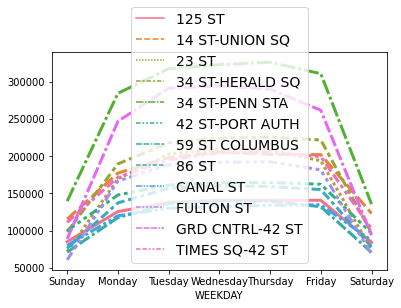

In [11]:
top_stations_weekly_averages = sns.lineplot(data=top_stations_weekday_averages_wide, linewidth = 3)
top_stations_weekly_averages.legend(fontsize='14')
sns.set(rc={'figure.figsize':(12,6)})
# top_stations_weekly_averages.get_figure().savefig('../svg/top_stations_weekly_averages.svg', format='svg')

Retrieve POI Stations

In [12]:
poi_list = ['116 ST-COLUMBIA','14 ST','34 ST-PENN STA','5 AVE','68ST-HUNTER CO','ASTOR PL','CANAL ST','CORTLANDT ST','JAY ST-METROTEC']
poi_stations_df = mta_data[mta_data.STATION.isin(poi_list)]
poi_stations_df = poi_stations_df.groupby(['STATION','DATE','WEEKDAY'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False)

In [13]:
targets_df = poi_stations_df[poi_stations_df.STATION.isin(top_stations_list)]

Line Plots for select Stations

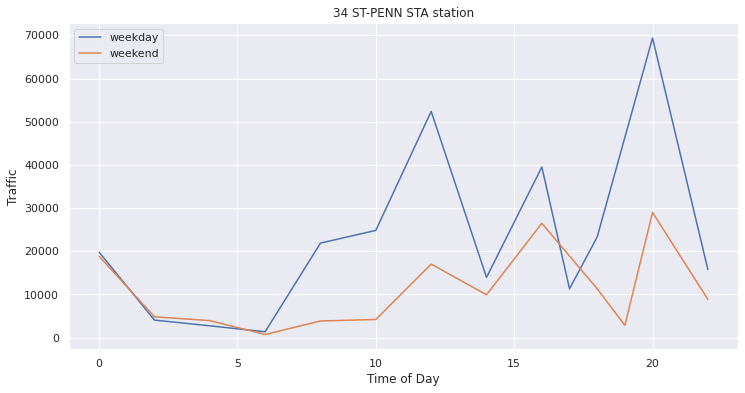

In [14]:
hourlyLinePlots(mta_data, '34 ST-PENN STA')

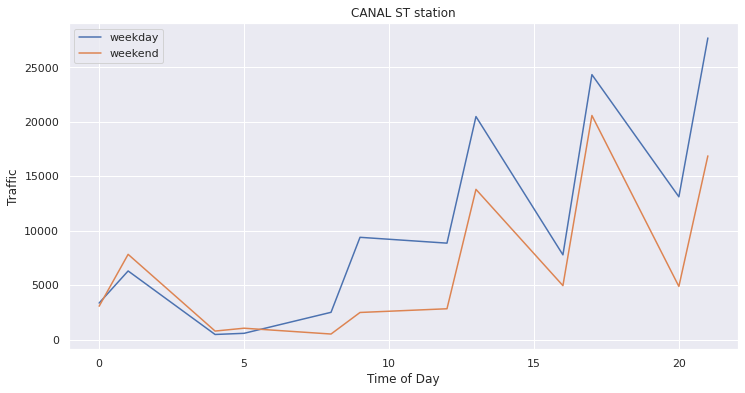

In [15]:
hourlyLinePlots(mta_data, 'CANAL ST')

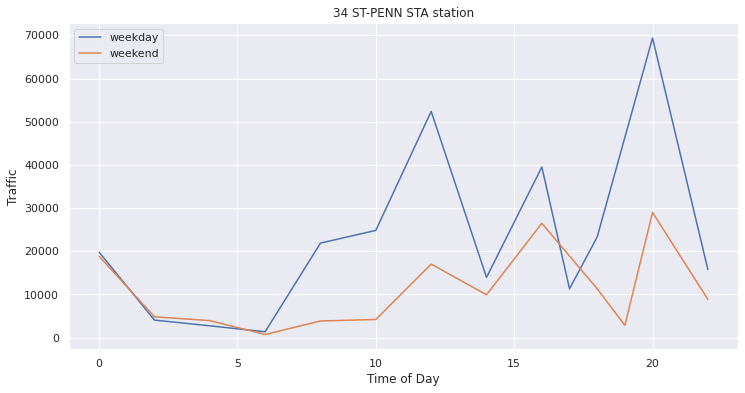

In [16]:
hourlyLinePlots(mta_data, '34 ST-PENN STA')

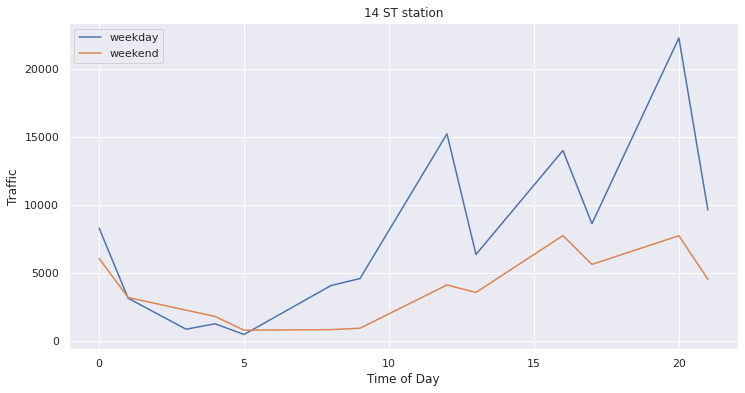

In [17]:
hourlyLinePlots(mta_data, '14 ST')

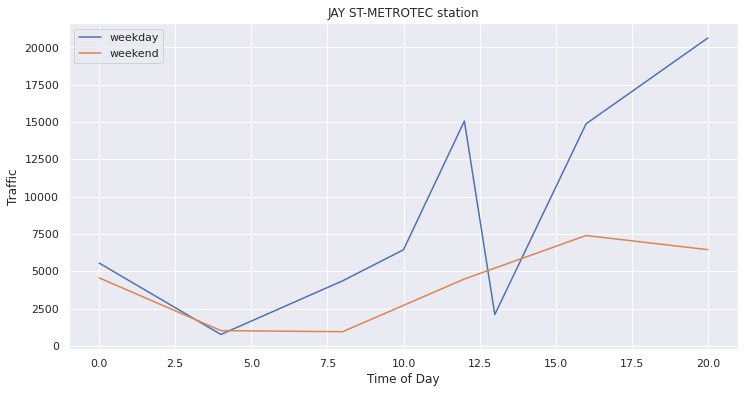

In [18]:
hourlyLinePlots(mta_data, 'JAY ST-METROTEC')